In [1]:
# !pip install yfinance
# !pip install arch
# !pip install mlfinlab

# pip install pandas-datareader


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
import scipy.stats as ss
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import random 
import statsmodels.tsa.stattools as ts
import warnings
from arch.unitroot import PhillipsPerron, VarianceRatio
import statsmodels.api as sm
# from mlfinlab.labeling.trend_scanning import trend_scanning_labels
from collections import defaultdict
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.api import OLS

C:\Users\ajeet\AppData\Roaming\Python\Python310\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
from mlpairs import OpticsPairs

stock_prices = pd.read_csv('NIFTYdata.csv',
                           index_col=0,
                           parse_dates=True)






In [4]:
stock_prices.head()

,HCLTECH,HINDALCO,ULTRACEMCO,UPL,JSWSTEEL,HDFCLIFE,NESTLEIND,TATACONSUM,TATASTEEL,GRASIM,...,TCS,HEROMOTOCO,SUNPHARMA,ASIANPAINT,CIPLA,POWERGRID,ITC,MARUTI,NTPC,EICHERMOT
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-19,414.335571,207.551956,3897.652588,441.405853,242.932754,421.576111,7044.093262,250.017960,23.329866,1068.891968,...,1270.238525,2931.509521,474.072540,1065.621704,546.710754,110.530868,212.053879,8317.516602,104.703987,2451.283936
2018-03-20,419.120667,210.212250,3862.723145,447.978027,244.560349,418.557068,7207.848145,251.409073,24.062284,1066.848145,...,1285.426636,2930.258301,484.646667,1069.439331,540.020386,110.929253,212.094818,8344.916016,104.327805,2536.926025
2018-03-21,419.187714,207.697067,3923.948242,449.613190,247.044464,418.210571,7218.694824,252.512375,23.626078,1065.485352,...,1281.792358,2888.395508,480.598023,1066.588257,538.213379,110.530868,211.972046,8413.411133,106.804337,2502.969727
2018-03-22,416.146759,209.728561,3851.291748,450.871033,244.988648,423.159821,7207.204590,248.339020,23.571302,1063.733521,...,1270.395508,2878.971680,484.313293,1070.019165,528.153259,109.677132,211.358337,8244.567383,107.180511,2507.411133
2018-03-23,428.154205,199.377579,3800.858887,443.229706,244.988648,424.793060,7164.047852,247.427567,22.986990,1053.708374,...,1264.472656,2846.823486,478.597534,1075.383301,525.858154,110.559319,209.476364,8159.907227,106.616242,2495.388672


In [49]:
train = stock_prices[:'2022']
test = stock_prices['2023':]

train.head()
# test.tail()

,HCLTECH,HINDALCO,ULTRACEMCO,UPL,JSWSTEEL,HDFCLIFE,NESTLEIND,TATACONSUM,TATASTEEL,GRASIM,...,TCS,HEROMOTOCO,SUNPHARMA,ASIANPAINT,CIPLA,POWERGRID,ITC,MARUTI,NTPC,EICHERMOT
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-19,414.335571,207.551956,3897.652588,441.405853,242.932754,421.576111,7044.093262,250.017960,23.329866,1068.891968,...,1270.238525,2931.509521,474.072540,1065.621704,546.710754,110.530868,212.053879,8317.516602,104.703987,2451.283936
2018-03-20,419.120667,210.212250,3862.723145,447.978027,244.560349,418.557068,7207.848145,251.409073,24.062284,1066.848145,...,1285.426636,2930.258301,484.646667,1069.439331,540.020386,110.929253,212.094818,8344.916016,104.327805,2536.926025
2018-03-21,419.187714,207.697067,3923.948242,449.613190,247.044464,418.210571,7218.694824,252.512375,23.626078,1065.485352,...,1281.792358,2888.395508,480.598023,1066.588257,538.213379,110.530868,211.972046,8413.411133,106.804337,2502.969727
2018-03-22,416.146759,209.728561,3851.291748,450.871033,244.988648,423.159821,7207.204590,248.339020,23.571302,1063.733521,...,1270.395508,2878.971680,484.313293,1070.019165,528.153259,109.677132,211.358337,8244.567383,107.180511,2507.411133
2018-03-23,428.154205,199.377579,3800.858887,443.229706,244.988648,424.793060,7164.047852,247.427567,22.986990,1053.708374,...,1264.472656,2846.823486,478.597534,1075.383301,525.858154,110.559319,209.476364,8159.907227,106.616242,2495.388672


# Dimensionality Reduction

## Calculate return Series

In [6]:
op = OpticsPairs(train)
op.returns.head()

,HCLTECH,HINDALCO,ULTRACEMCO,UPL,JSWSTEEL,HDFCLIFE,NESTLEIND,TATACONSUM,TATASTEEL,GRASIM,...,TCS,HEROMOTOCO,SUNPHARMA,ASIANPAINT,CIPLA,POWERGRID,ITC,MARUTI,NTPC,EICHERMOT
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-20,0.011549,0.012817,-0.008962,0.014889,0.006700,-0.007161,0.023247,0.005564,0.031394,-0.001912,...,0.011957,-0.000427,0.022305,0.003583,-0.012237,0.003604,0.000193,0.003294,-0.003593,0.034938
2018-03-21,0.000160,-0.011965,0.015850,0.003650,0.010157,-0.000828,0.001505,0.004388,-0.018128,-0.001277,...,-0.002827,-0.014286,-0.008354,-0.002666,-0.003346,-0.003591,-0.000579,0.008208,0.023738,-0.013385
2018-03-22,-0.007254,0.009781,-0.018516,0.002798,-0.008322,0.011834,-0.001592,-0.016527,-0.002318,-0.001644,...,-0.008891,-0.003263,0.007731,0.003217,-0.018692,-0.007724,-0.002895,-0.020068,0.003522,0.001774
2018-03-23,0.028854,-0.049354,-0.013095,-0.016948,0.000000,0.003860,-0.005988,-0.003670,-0.024789,-0.009424,...,-0.004662,-0.011167,-0.011802,0.005013,-0.004346,0.008043,-0.008904,-0.010269,-0.005265,-0.004795
2018-03-26,0.010079,0.021591,0.019684,0.027882,0.027622,0.019574,0.004523,0.016673,0.026566,-0.001847,...,-0.000408,0.019905,0.001592,0.004404,0.006315,0.003346,0.008203,0.018362,-0.001176,-0.000826


Return is in Percentage Example - HCL tech = 1.2817%

Apply PCA

Principal component analysis is applied to the scaled return series. The below graphs plot the loadings on of each security on the first five principal components. It is unsurprising that nearly every security has a similar loading on the first principal component. This component is generally interpreted as the “market” component of financial instruments which explains much of the variation in price movements across securities. 

## Step 1: Standardize Data

## Step 2: Compute Covariance Matrix

## Step 3: Compute Eigenvectors and Eigenvalues 

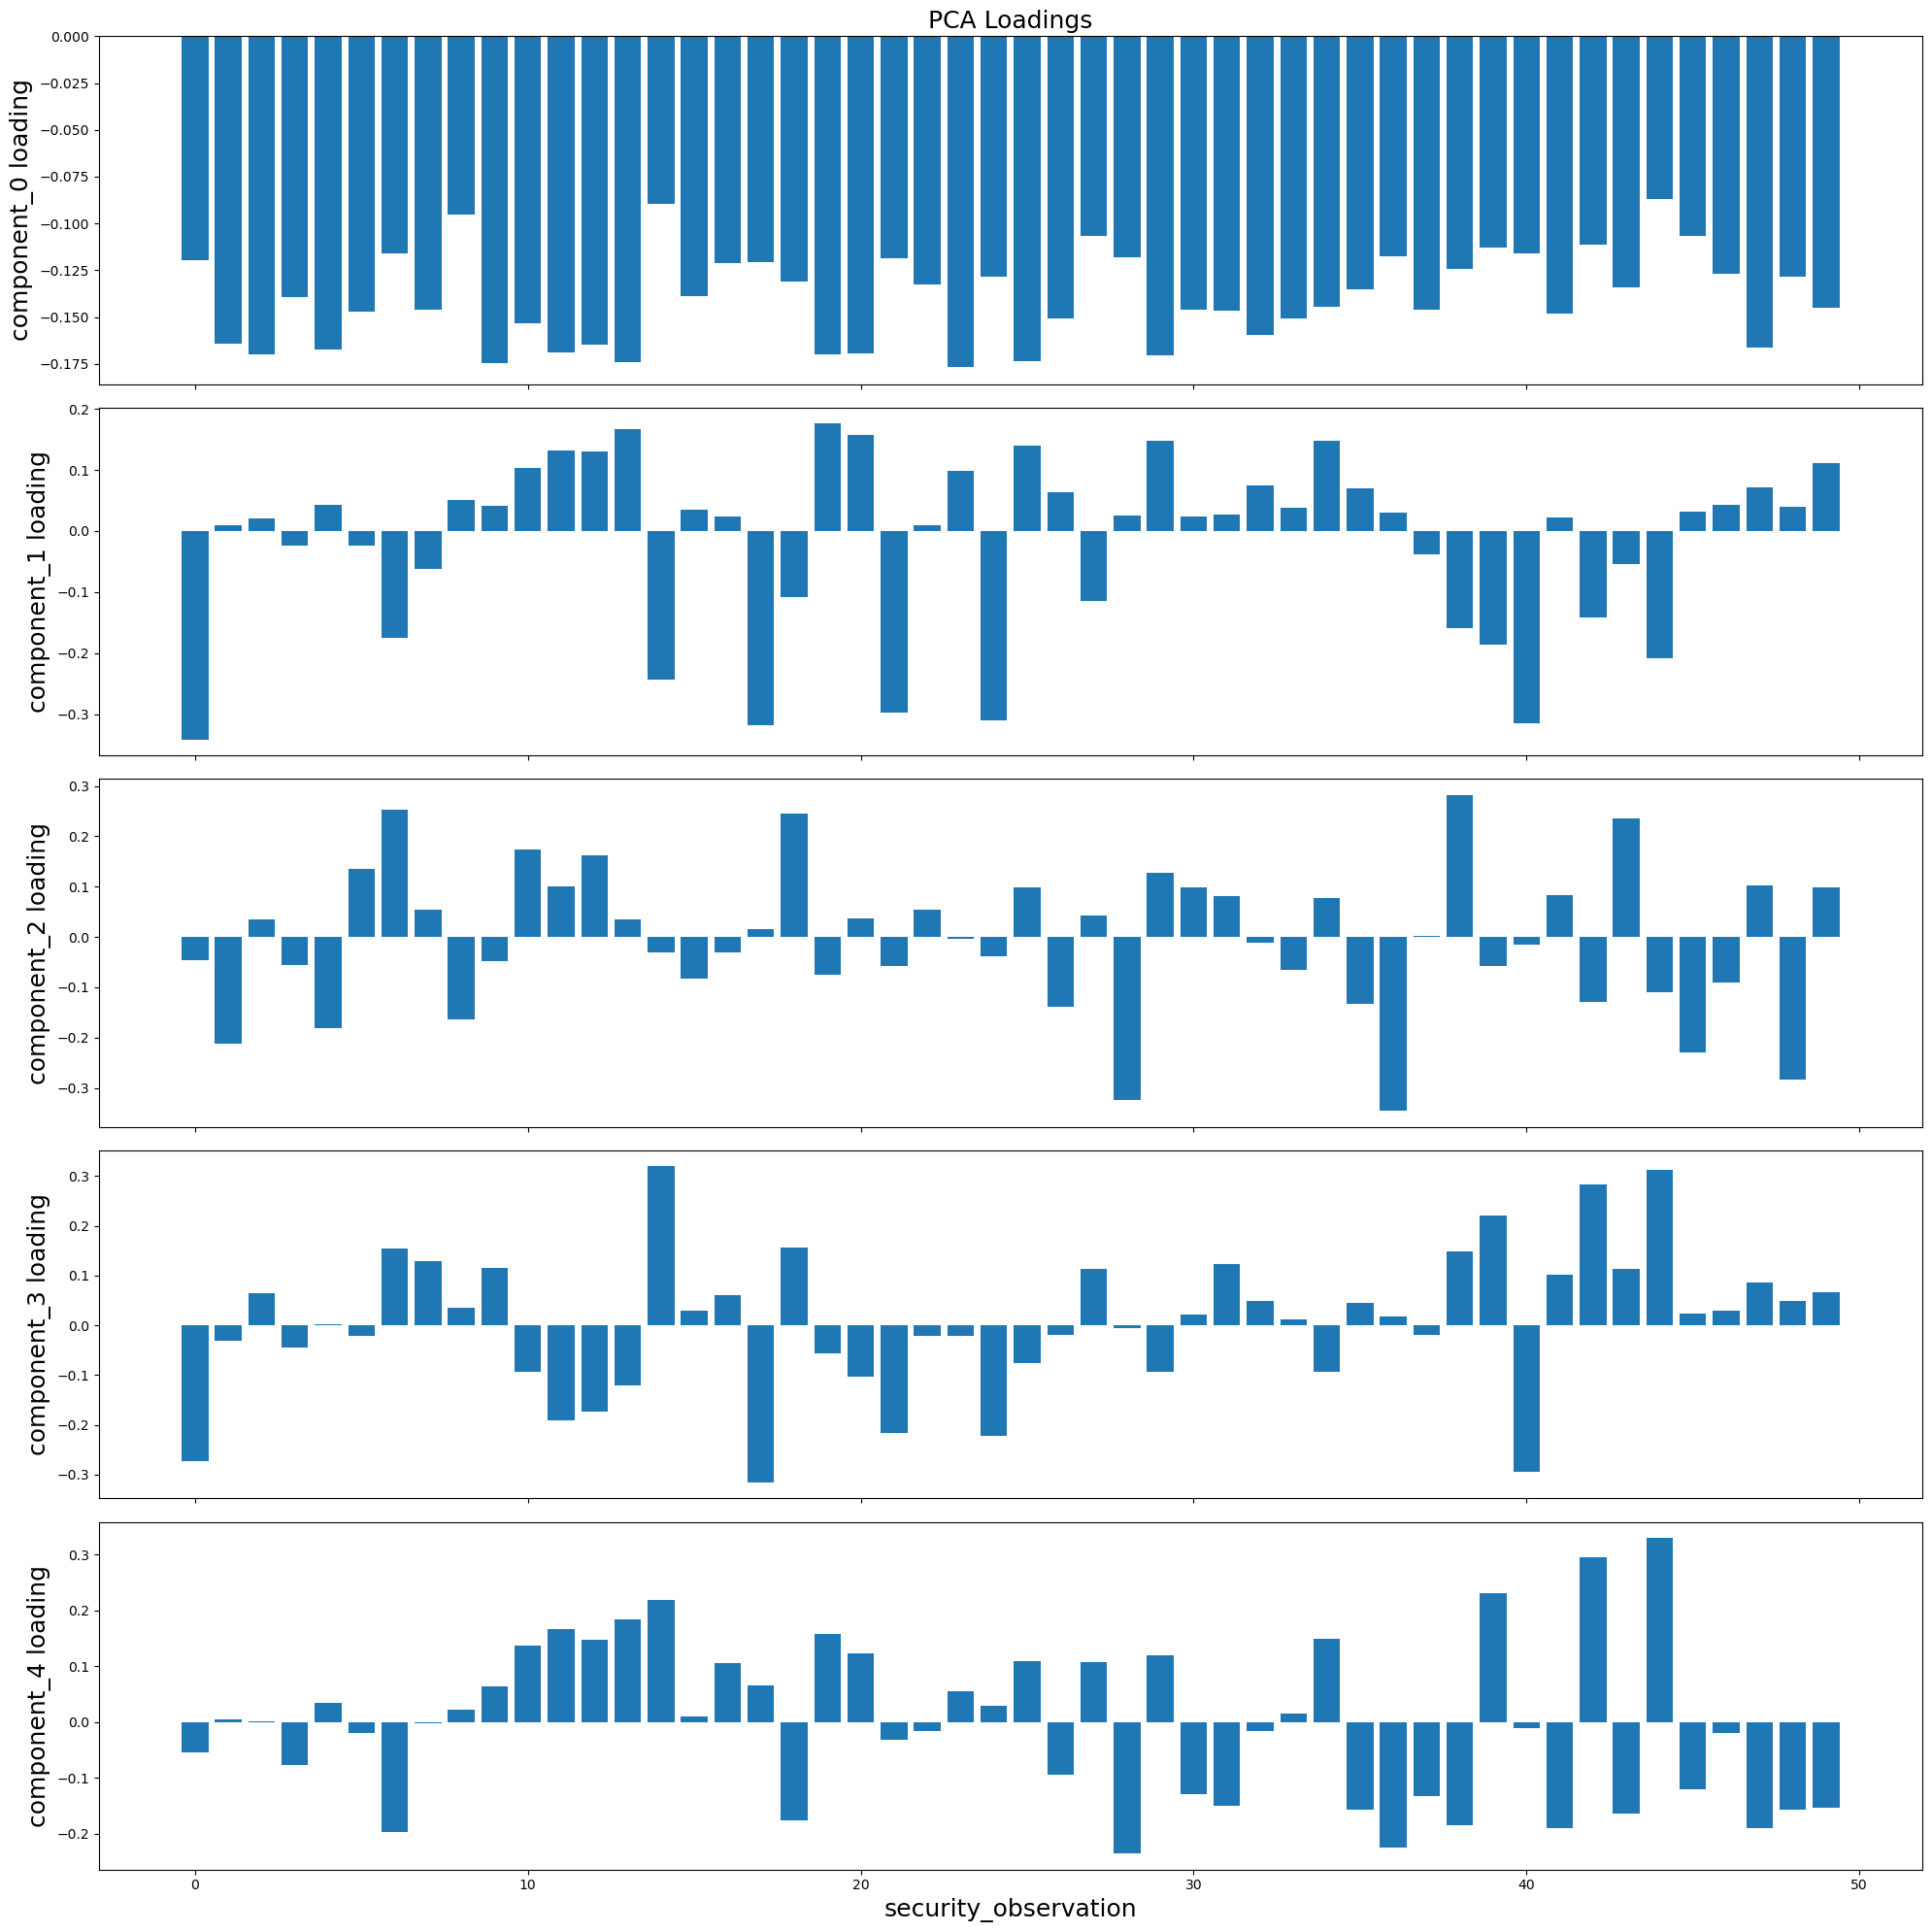

In [7]:
op.reduce_PCA()
op.plot_loadings()

Total variance explained: 60.0%


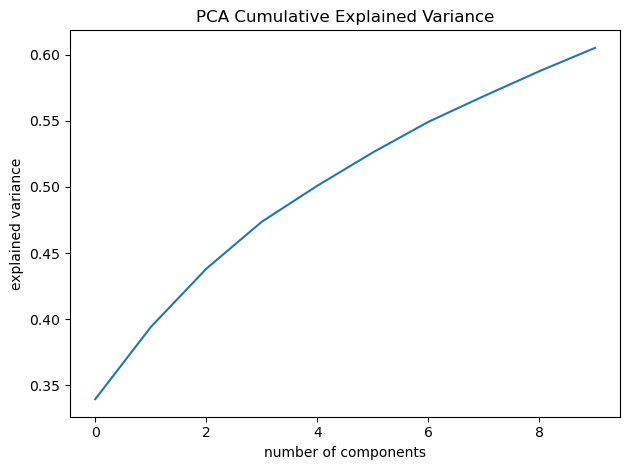

In [8]:
import numpy as np 
op.plot_explained_variance()
total_variance_explained = np.cumsum(op.explained_variance_ratio_)[-1]
print(f"Total variance explained: {round(total_variance_explained, 2)*100}%")

In [9]:

op.find_pairs()
op.pairs

Found 76 potential pairs


0              (HCLTECH, INFY)
1             (HCLTECH, WIPRO)
2             (HCLTECH, TECHM)
3               (HCLTECH, TCS)
4                (INFY, WIPRO)
                ...           
71    (BAJAJFINSV, INDUSINDBK)
72           (BAJAJFINSV, ITC)
73    (BAJFINANCE, INDUSINDBK)
74           (BAJFINANCE, ITC)
75           (INDUSINDBK, ITC)
Length: 76, dtype: object

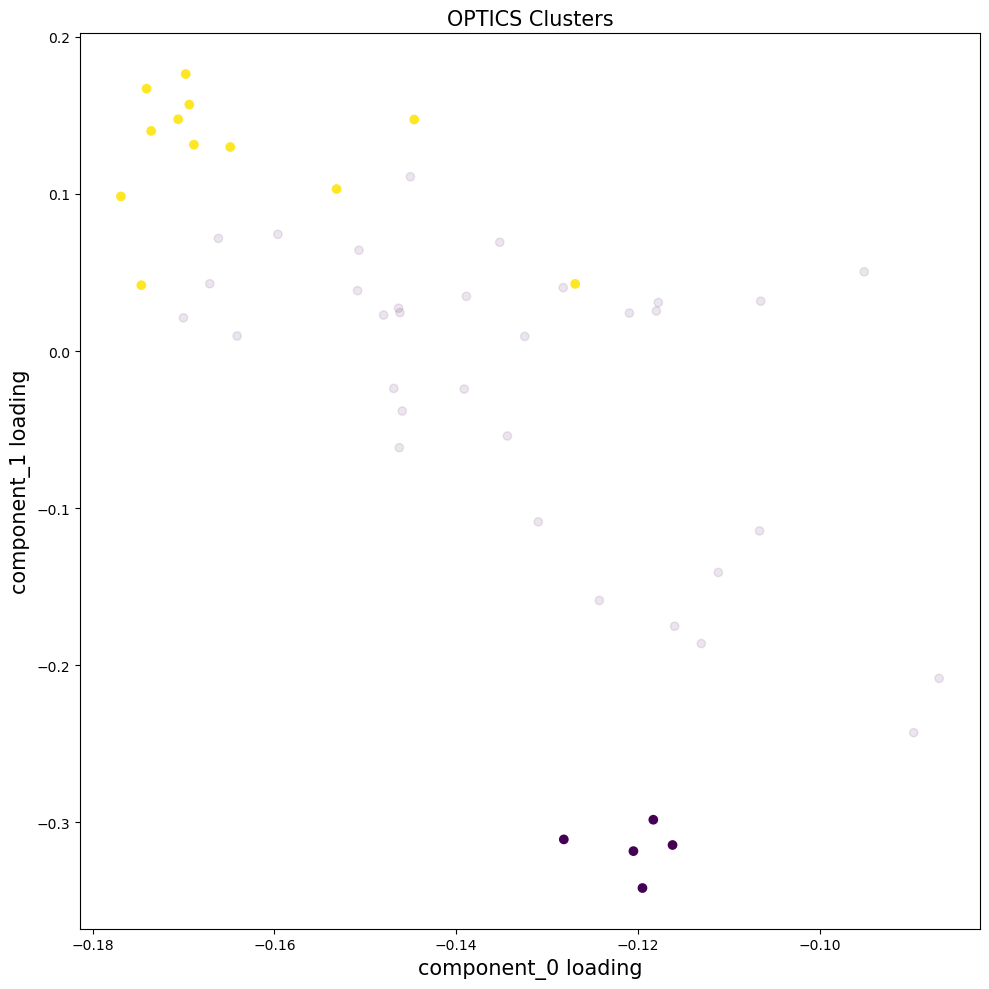

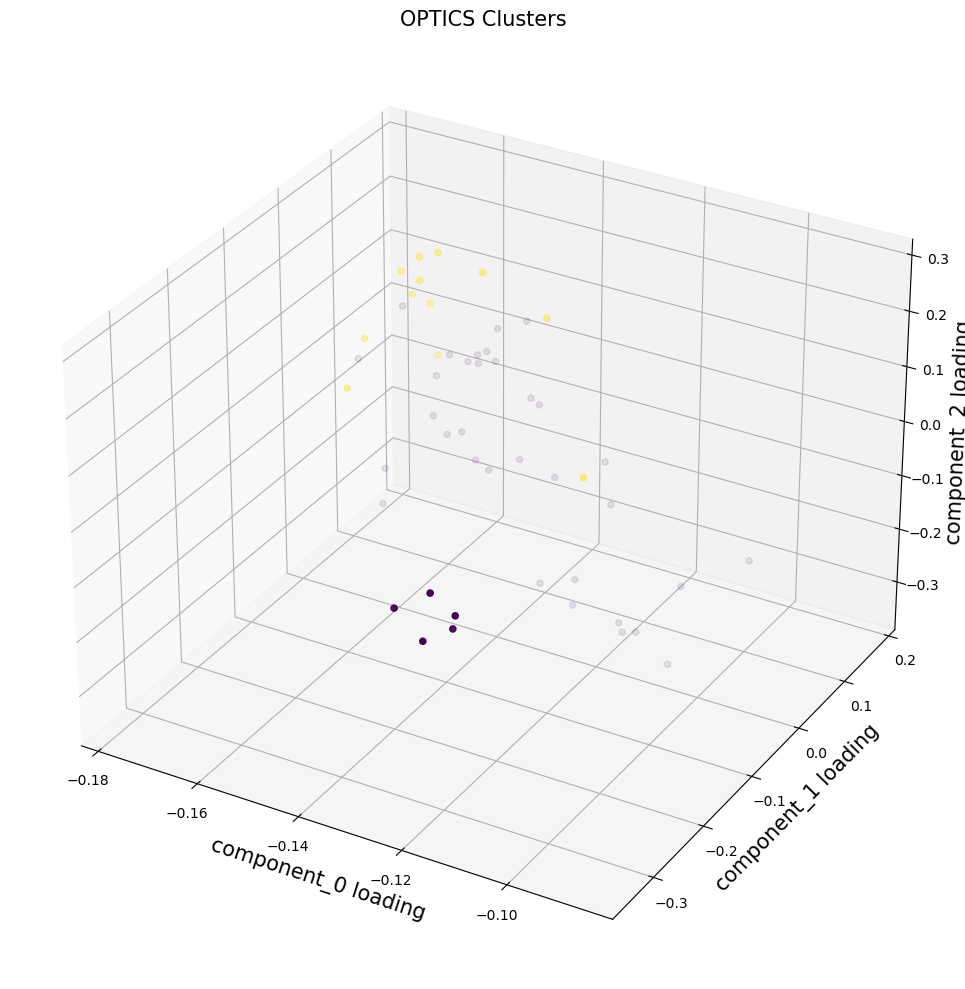

In [25]:
op.plot_clusters(n_dimensions=2)
op.plot_clusters(n_dimensions=3)

#### Apply Critera


Sarmento and Horta suggest four criteria to further filter the potential pairs to increase the probability of selecting pairs of securities whose prices will continue to mean revert in the future.

* Statistically significant t-stat from the Engle-Granger test (5% level)

* Hurst exponent < 0.5

* Half-life between [1, 252]

* Spread must cross the mean on average 12x per year


These four criteria indicate positive characteristics for potential pairs of securities. The Engle-Granger tests the pair for cointegration. A Hurst exponent below 0.5 indicates that the pair of prices regresses strongly to the mean. Pairs with extreme half-life values, below 1 or above 252, are excluded from the selected pairs. Extreme half-life values indicate a price series that either reverts too quickly or too slowly to be traded. Finally, the price series must cross the long-term spread mean on average 12 times a year. This enforces one trade on average, per month.

In [11]:
op.calc_eg_norm_spreads()
op.calc_hurst_exponents()
op.calc_half_lives()
op.calc_avg_cross_count()

In [12]:
op.filter_pairs()
op.filtered_pairs

Found 8 tradable pairs!


,pair,pvalue,hurst_exp,half_life,avg_cross_count
0,"(HCLTECH, INFY)",0.002108,0.321157,21.890074,16.559393
3,"(HCLTECH, TCS)",0.000019,0.293713,16.260124,22.928391
6,"(INFY, TCS)",0.000178,0.239234,18.703496,16.559393
21,"(KOTAKBANK, HDFC)",0.000600,0.266102,18.951258,13.587195
22,"(KOTAKBANK, HDFCBANK)",0.003451,0.269131,21.478376,19.106992
28,"(KOTAKBANK, BAJFINANCE)",0.028255,0.364531,32.830010,16.134794
31,"(HDFC, HDFCBANK)",0.010027,0.313749,20.437506,16.347094
56,"(SBIN, LT)",0.003686,0.344781,23.833484,20.593092


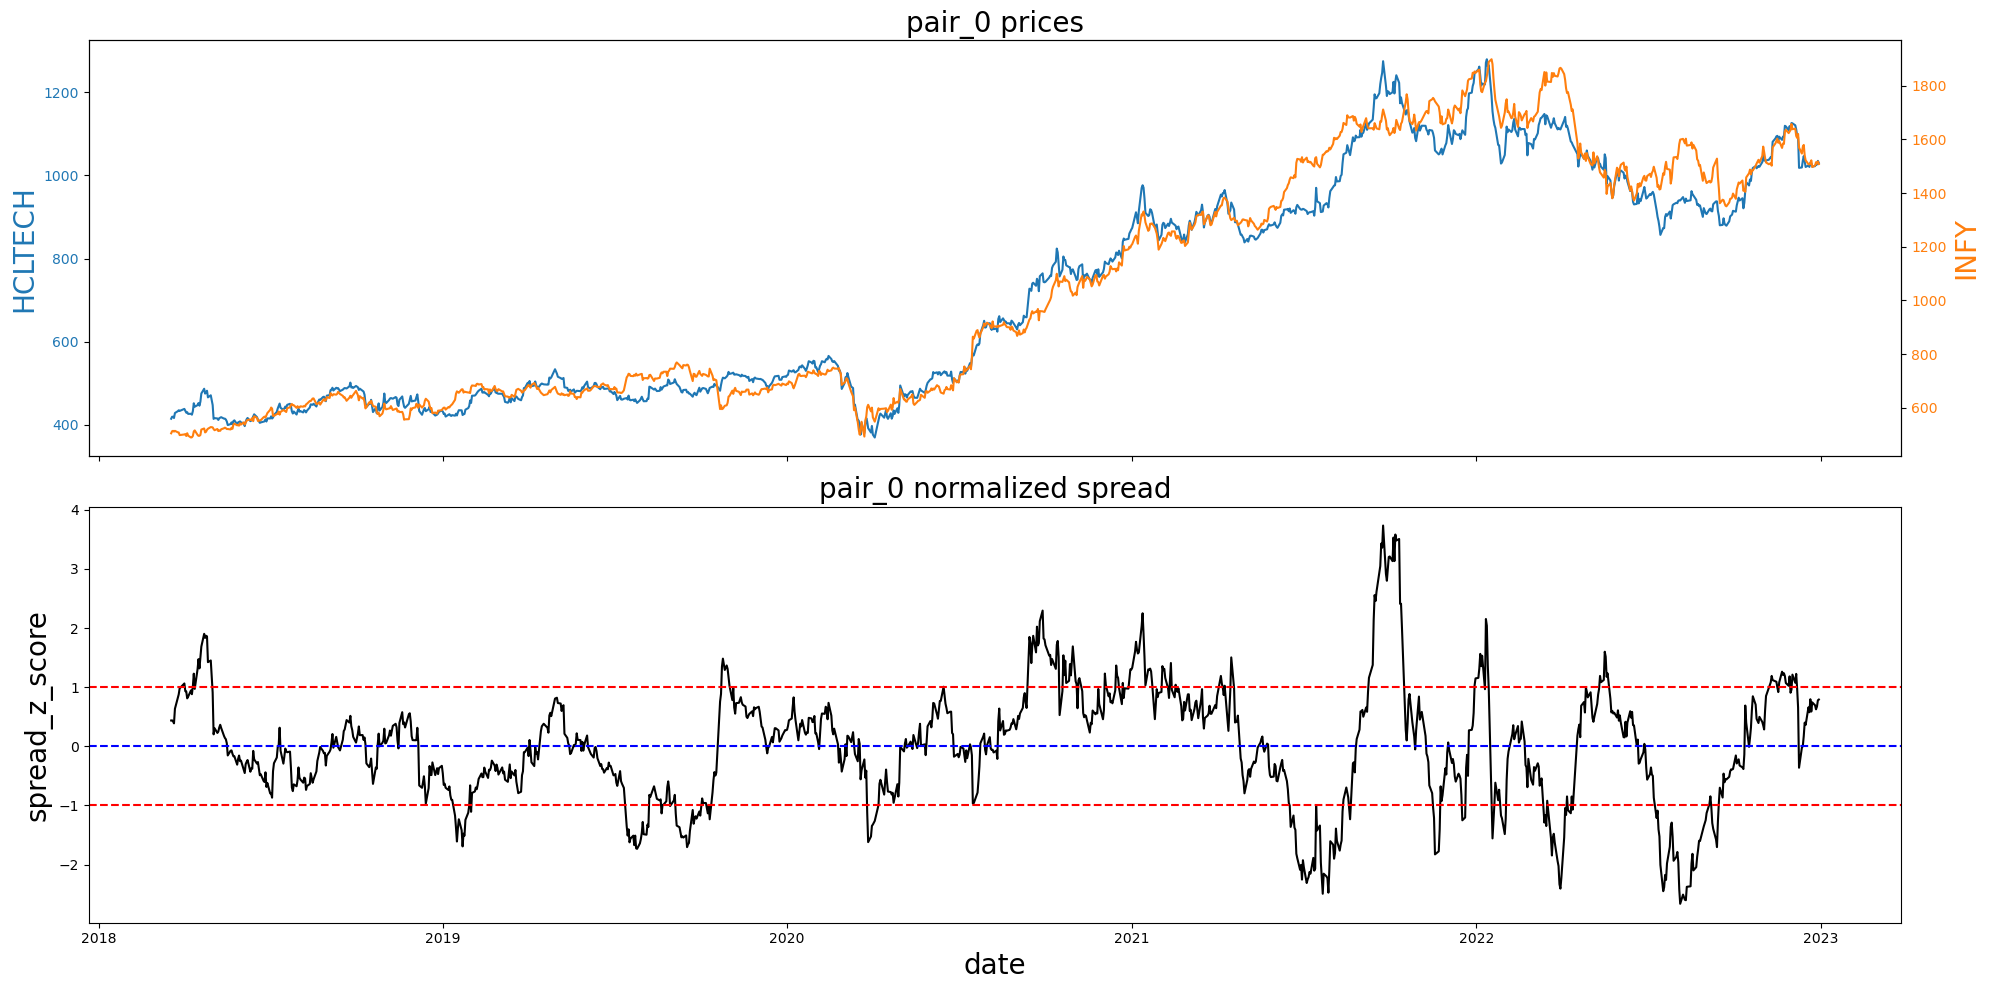

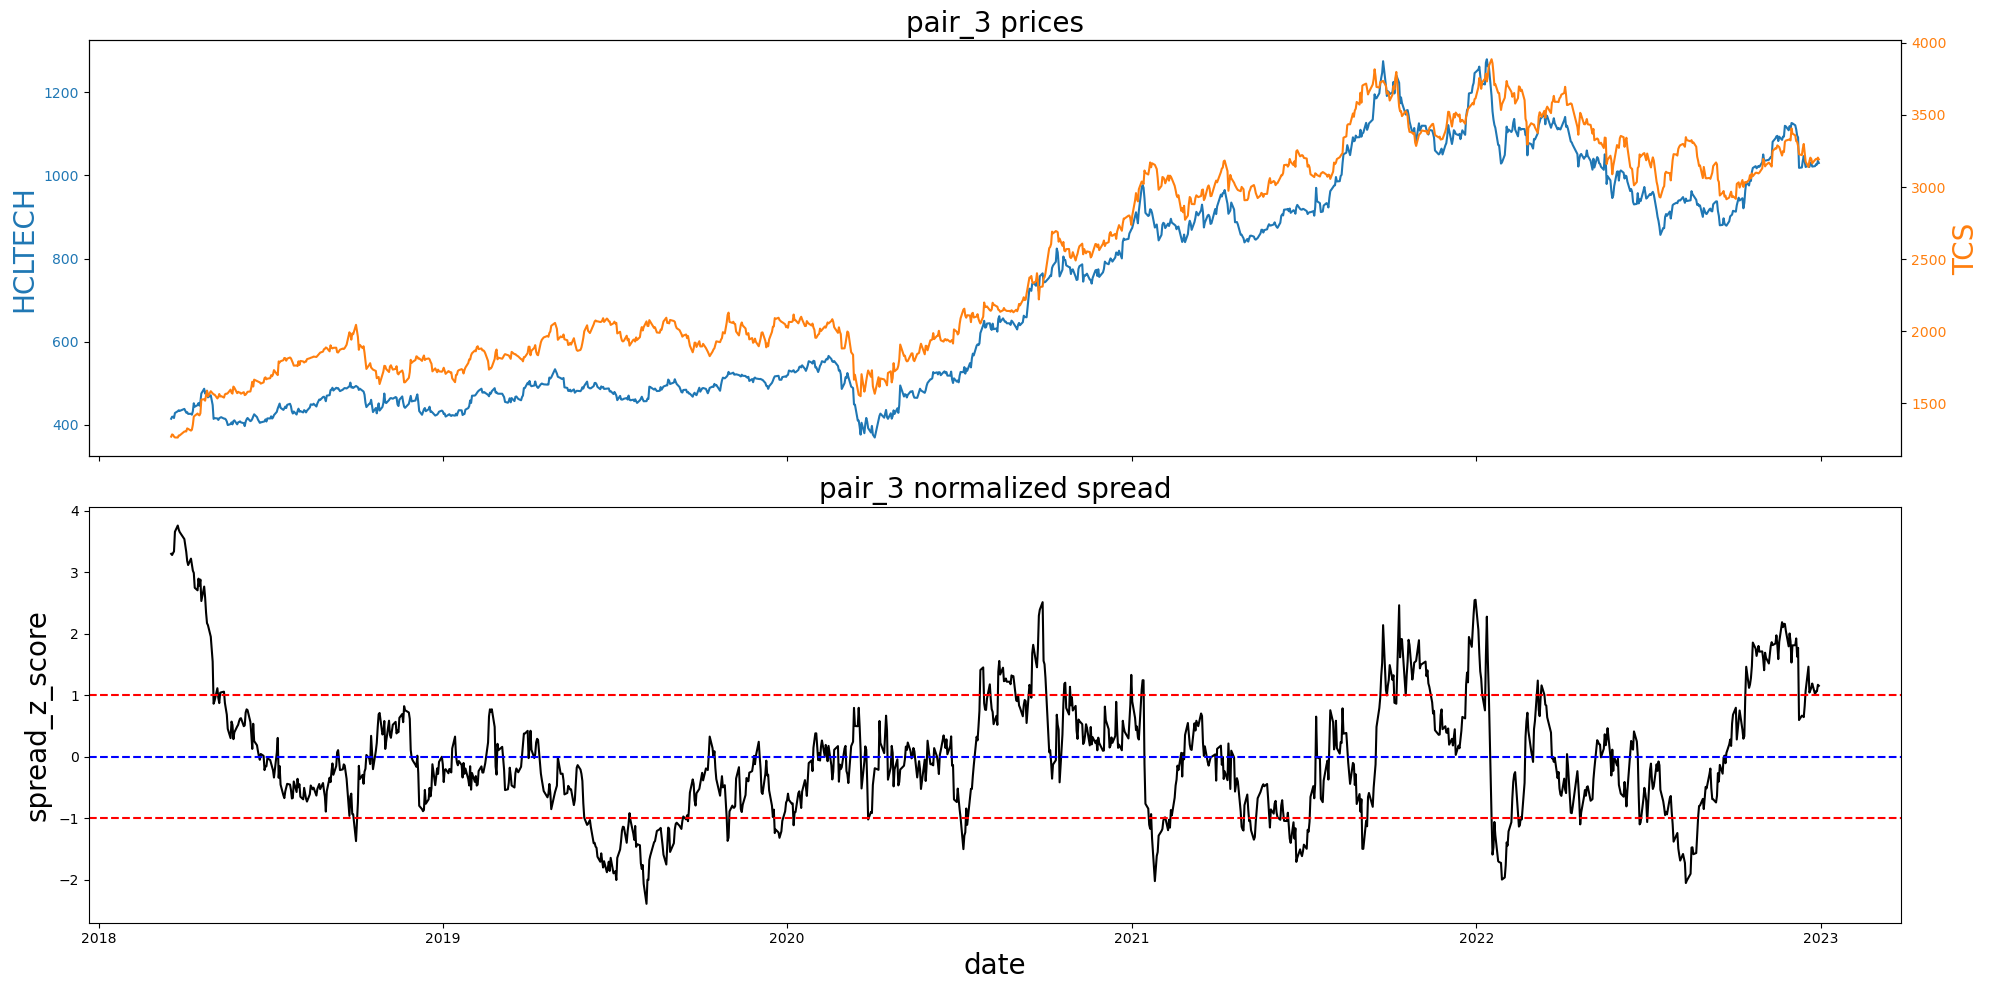

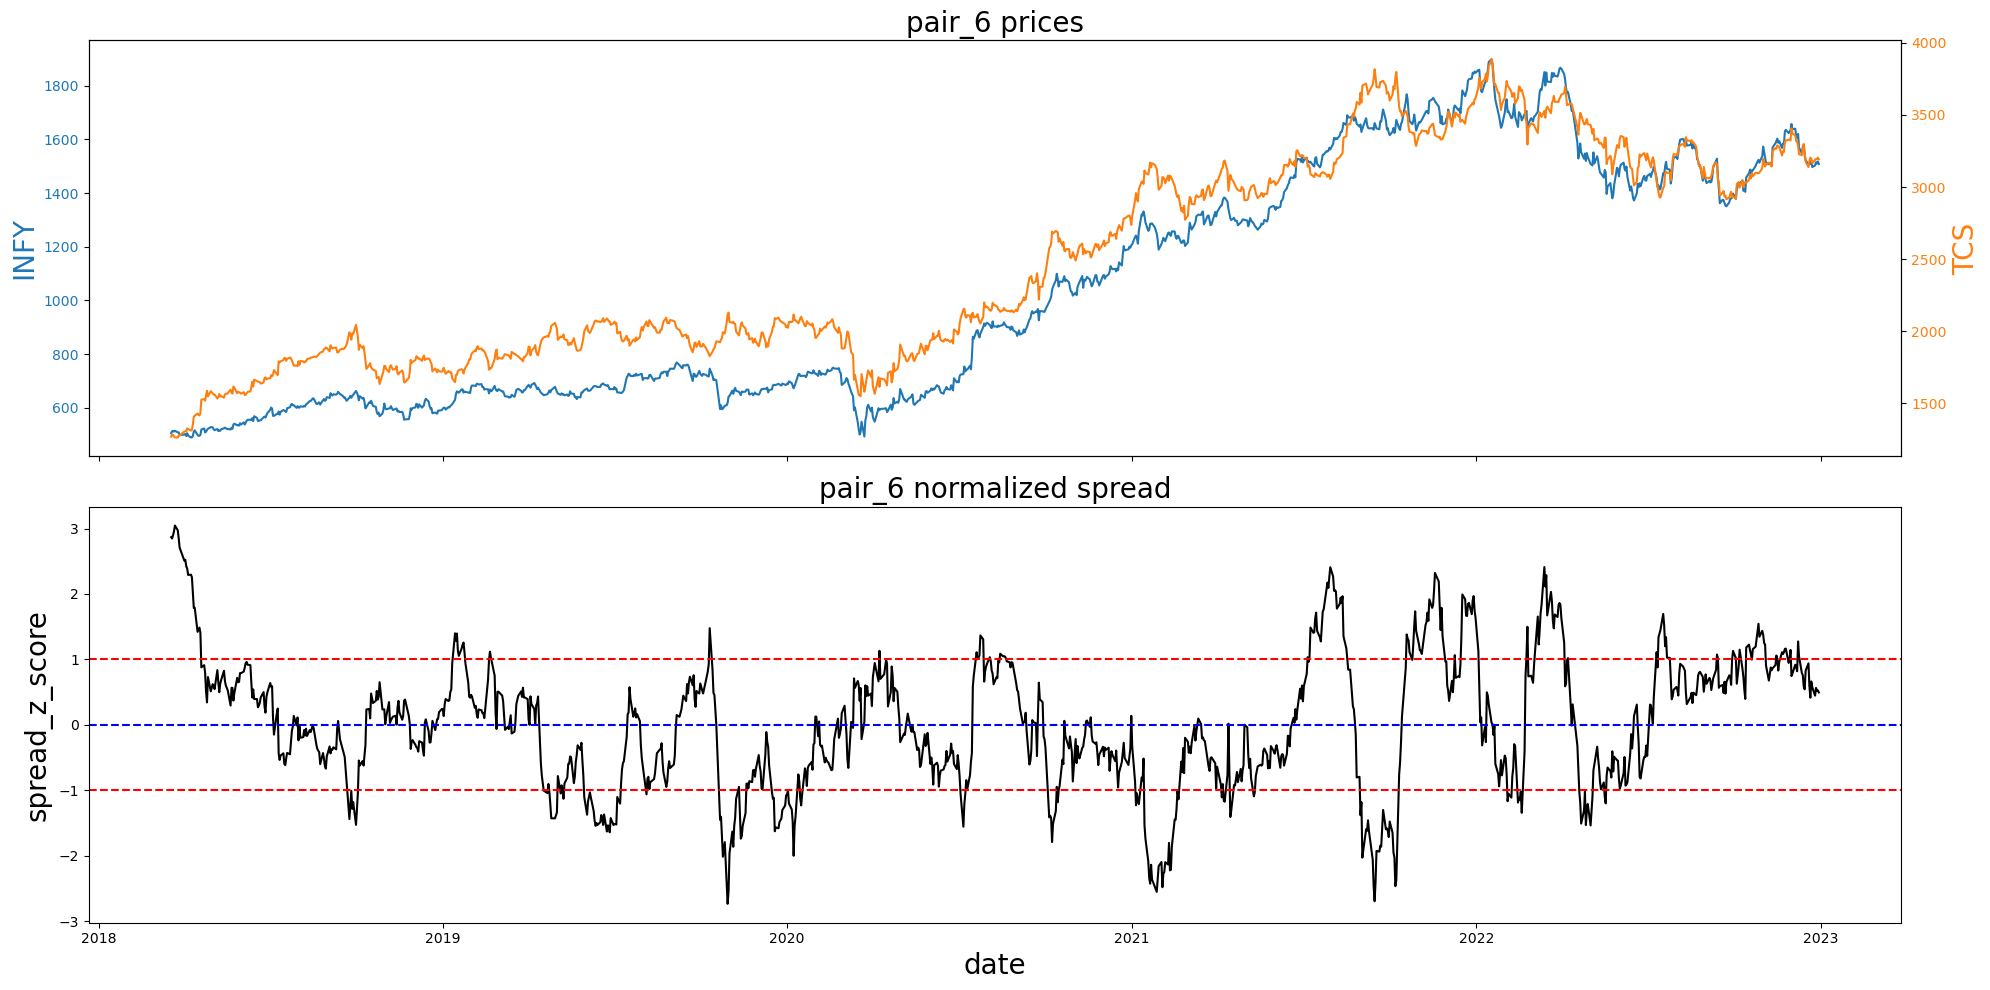

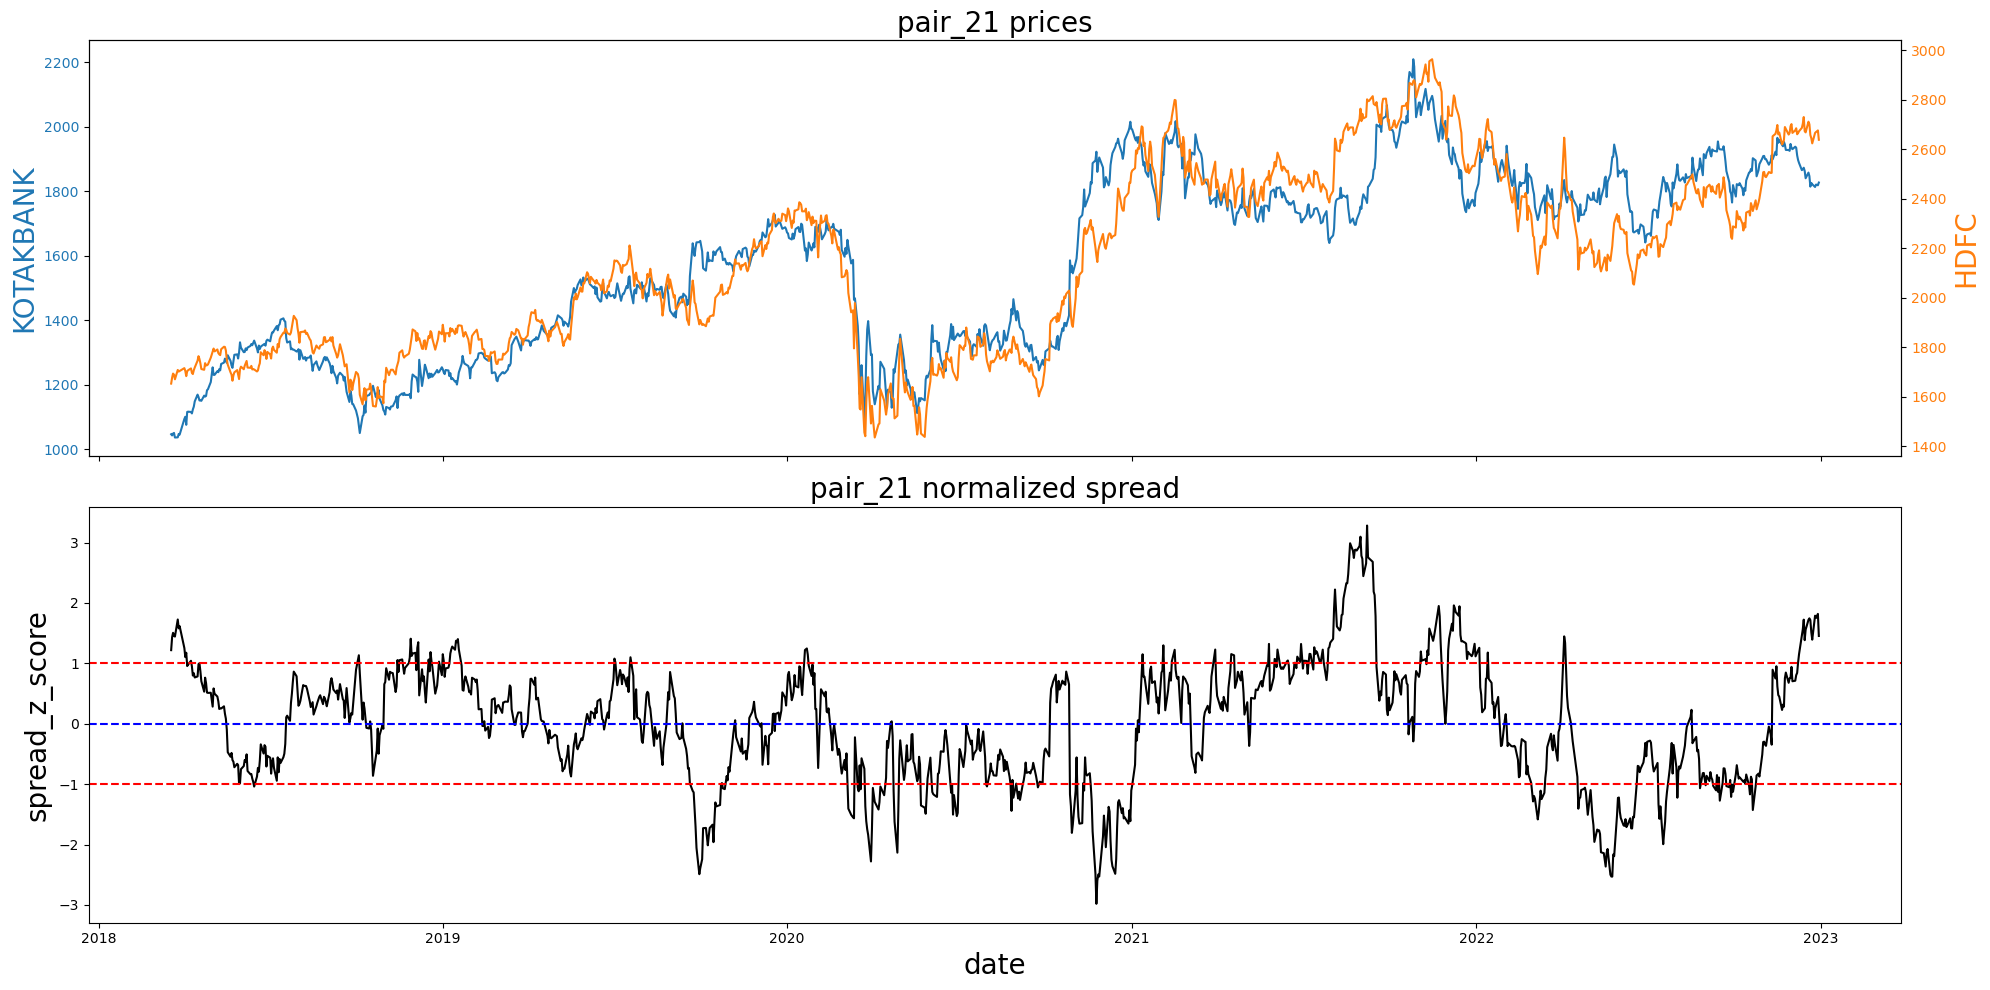

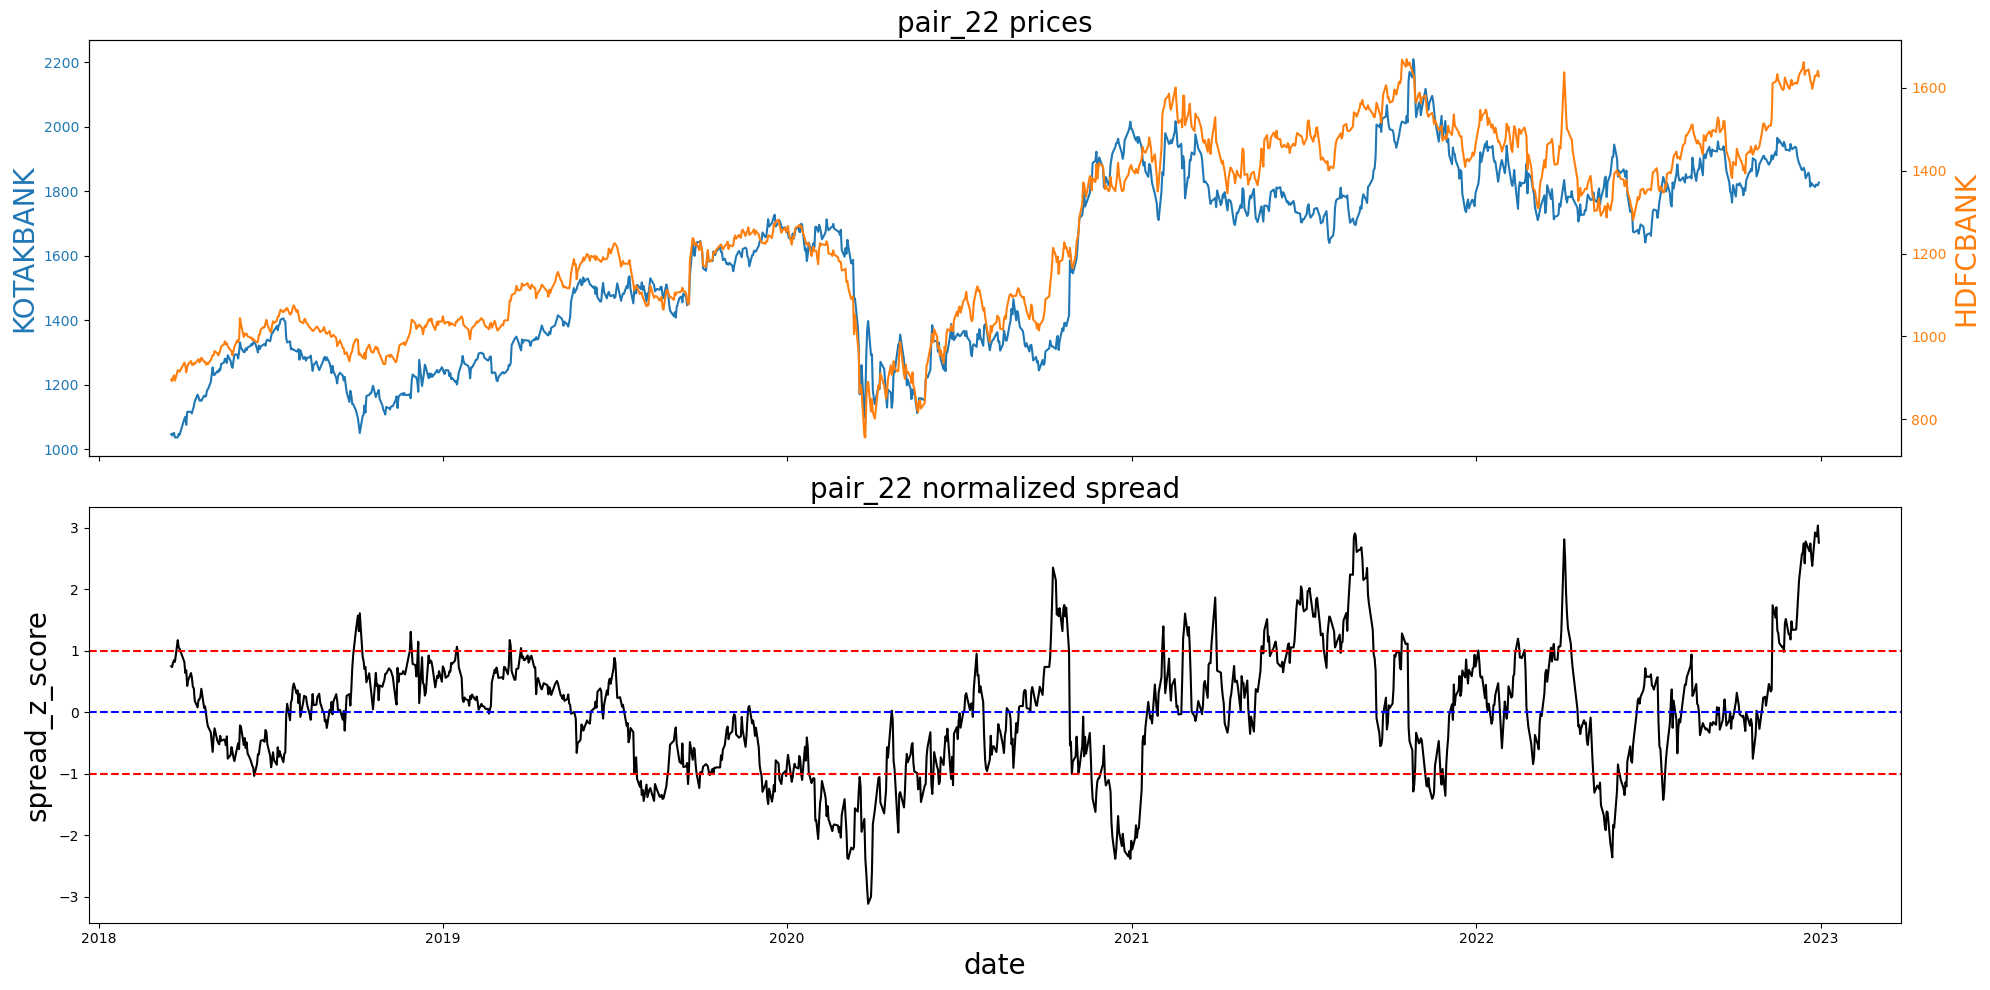

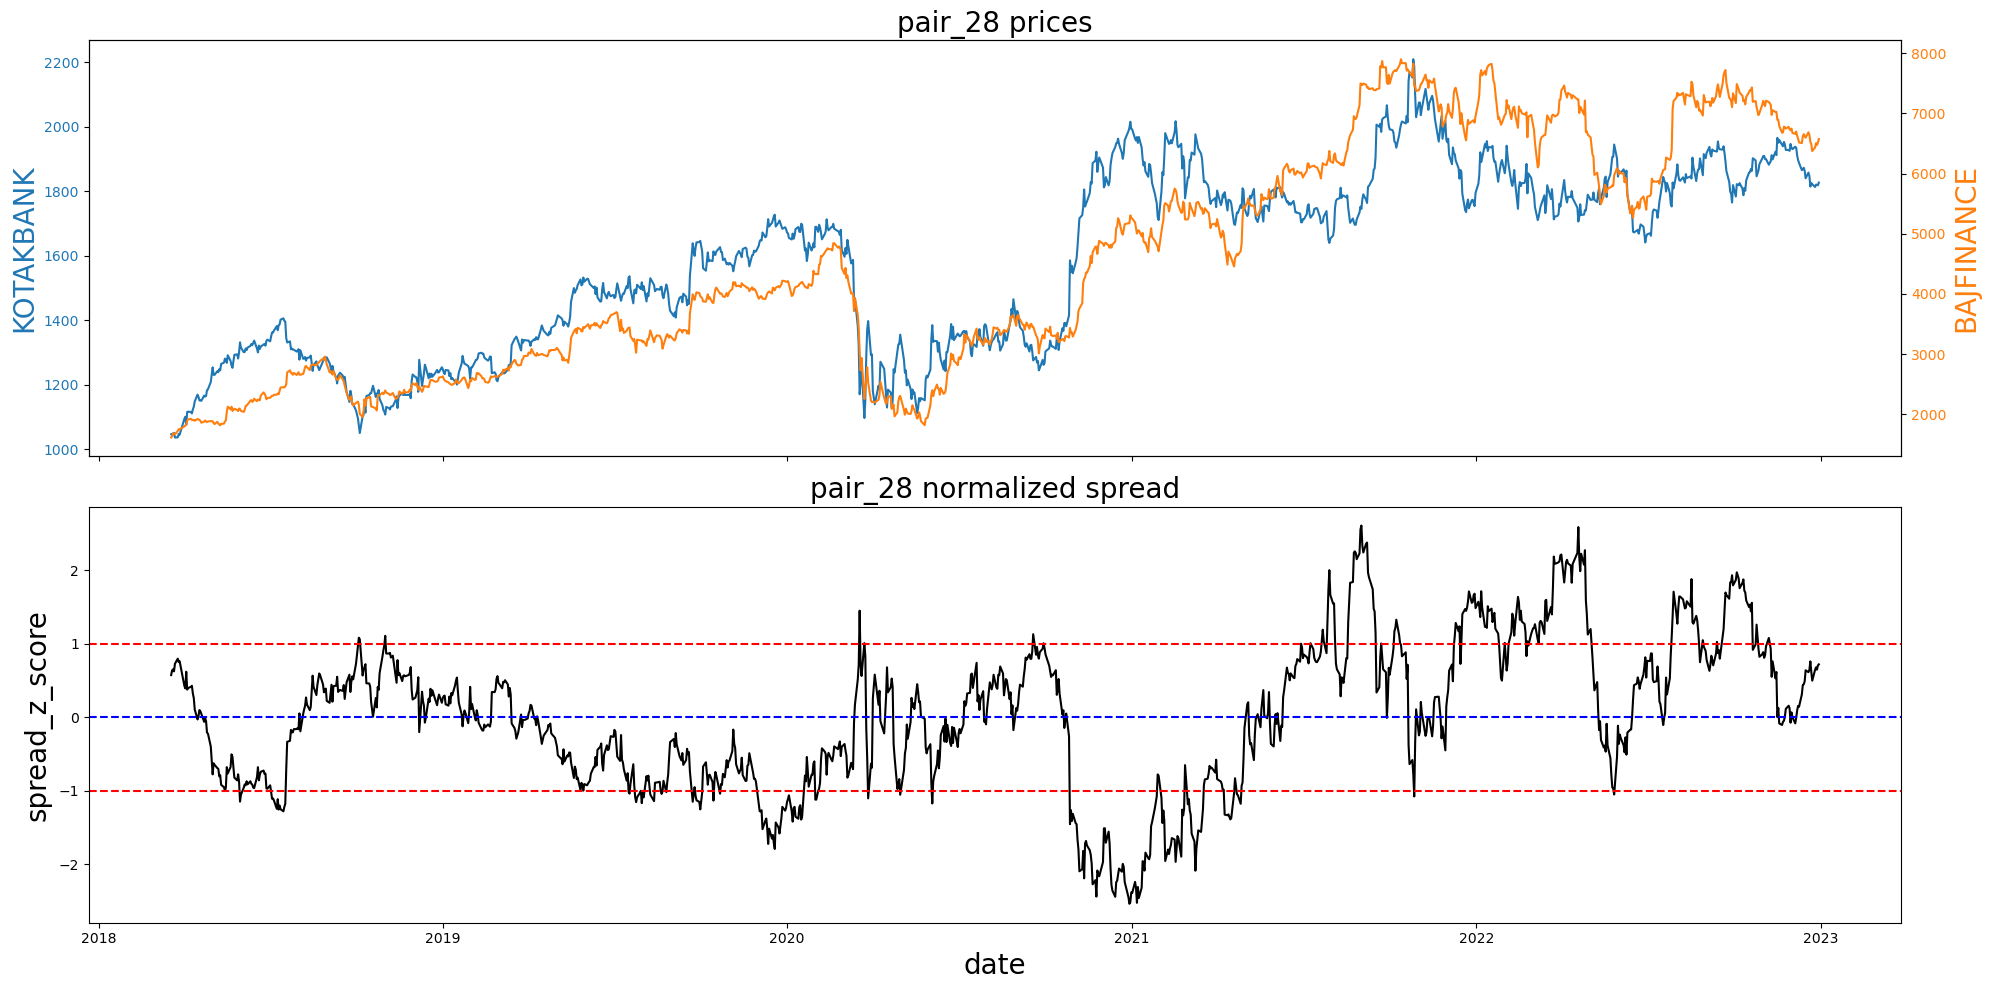

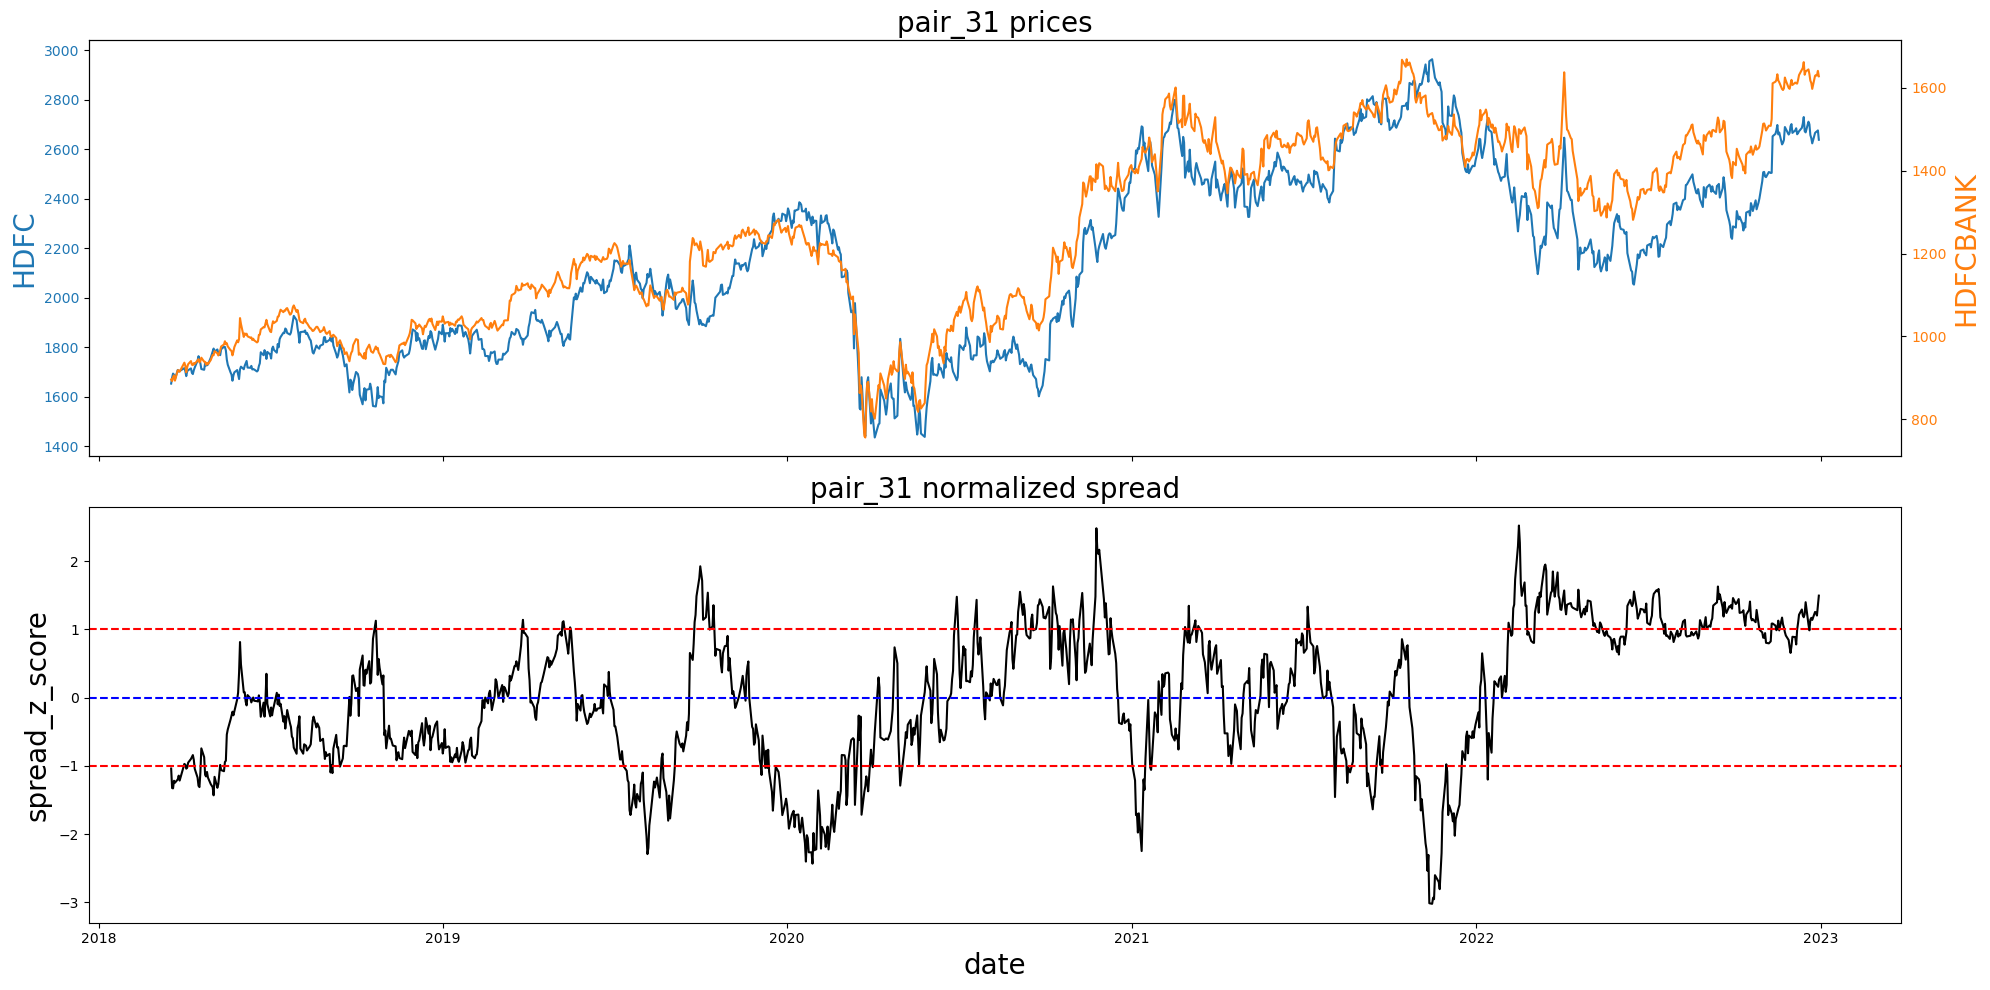

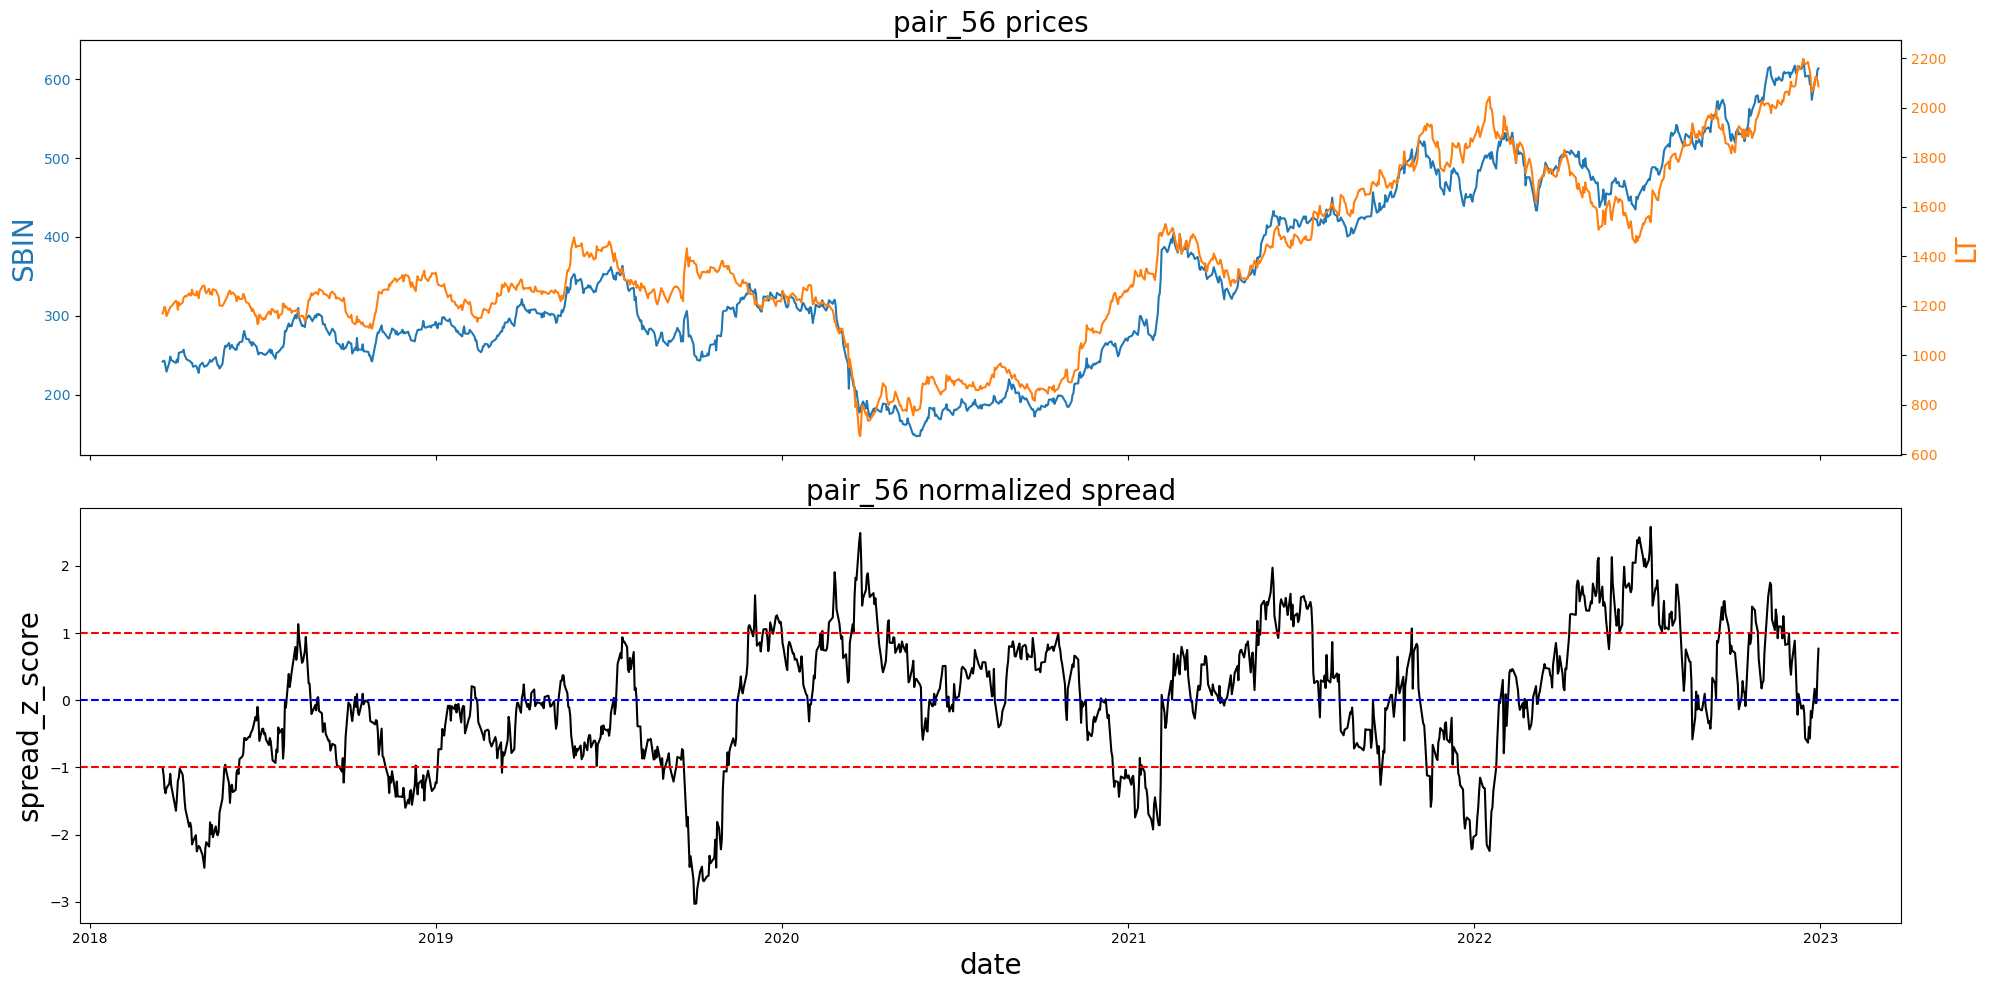

In [13]:
for i in op.filtered_pairs.index:
    op.plot_pair_price_spread(idx=i)

# We found 7 tradeable pairs

#### (HCLTECH, INFY)
#### (HCLTECH, TCS)
#### (INFY, TCS)
#### (KOTAKBANK, HDFC)
#### (KOTAKBANK, HDFCBANK)
#### (HDFC, HDFCBANK)
#### (ICICIBANK, BAJFINANCE)

In [14]:
# import matplotlib.pyplot as plt

# def plot_stock_comparison(stock1, stock2, title):
#     plt.figure(figsize=(10, 6))
#     plt.plot(train['HDFCBANK'], label=stock1)
#     plt.plot(train['KOTAKBANK'], label=stock2)
#     plt.title(title)
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.legend()
#     plt.show()

# plot_stock_comparison('HDFCBANK', 'KOTAKBANK', 'HDFCBANK and KOTAKBANK Stock Prices Comparison')
# plot_stock_comparison('HDFCBANK', 'HDFC', 'HDFCBANK and HDFC Stock Prices Comparison')


# We found 7 tradeable pairs

#### (HCLTECH, INFY)
#### (HCLTECH, TCS)
#### (INFY, TCS)
#### (KOTAKBANK, HDFC)
#### (KOTAKBANK, HDFCBANK)
#### (HDFC, HDFCBANK)
#### (ICICIBANK, BAJFINANCE)

In [15]:
# hurst_exponent	adf_t_stat	adf_p_value	kpss_t_stat	kpss_p_value	pp_t_stat	pp_p_value	vr_t_stat	vr_p_value

In [16]:
# Correlation

correlation = train['HCLTECH'].corr(train['INFY'])
print("Correlation HCLTECH and INFY:", correlation)


correlation1 = train['HCLTECH'].corr(train['TCS'])
print("Correlation HCLTECH and TCS:", correlation1)


correlation2 = train['TCS'].corr(train['INFY'])
print("Correlation TCS and INFY:", correlation2)


correlation3= train['KOTAKBANK'].corr(train['HDFC'])
print("Correlation KOTAKBANK and HDFC:", correlation3)


correlation4 = train['KOTAKBANK'].corr(train['HDFCBANK'])
print("Correlation KOTAKBANK and HDFCBANK:", correlation4)


correlation5 = train['HDFC'].corr(train['HDFCBANK'])
print("Correlation HDFC and HDFCBANK:", correlation5)


correlation6 = train['BAJFINANCE'].corr(train['ICICIBANK'])
print("Correlation BAJFINANCE and ICICIBANK:", correlation6)

Correlation HCLTECH and INFY: 0.9875074097843921
Correlation HCLTECH and TCS: 0.985914421195452
Correlation TCS and INFY: 0.9865451086217588
Correlation KOTAKBANK and HDFC: 0.9313663925082349
Correlation KOTAKBANK and HDFCBANK: 0.9479466322802338
Correlation HDFC and HDFCBANK: 0.9599383980725623
Correlation BAJFINANCE and ICICIBANK: 0.9576641971379584



# Stationary Tests

##### H0: Time series is stationary
##### H1: Time series is non-stationary

### We will perform 3 tests on each stock
##### 1. ADF
##### 2. PP
##### 3. KPSS

In [17]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def adf_kpss_test(data):
    adf_result = adfuller(data)
    kpss_result = kpss(data)
    return adf_result[1], kpss_result[1]

pairs = [("HCLTECH", "INFY"),
         ("HCLTECH", "TCS"),
         ("INFY", "TCS"),
         ("KOTAKBANK", "HDFC"),
         ("KOTAKBANK", "HDFCBANK"),
         ("HDFC", "HDFCBANK"),
         ("ICICIBANK", "BAJFINANCE")]

results = []

for pair in pairs:
    spread = train[pair[0]] - train[pair[1]]
    ratio = train[pair[0]] / train[pair[1]]
    
    adf_spread_pvalue, kpss_spread_pvalue = adf_kpss_test(spread)
    adf_ratio_pvalue, kpss_ratio_pvalue = adf_kpss_test(ratio)
    
    results.append({
        'Pair': pair,
        'ADF Spread p-value': adf_spread_pvalue,
        'KPSS Spread p-value': kpss_spread_pvalue,
        'ADF Ratio p-value': adf_ratio_pvalue,
        'KPSS Ratio p-value': kpss_ratio_pvalue
    })

results_df = pd.DataFrame(results)
print(results_df)


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is small

                      Pair  ADF Spread p-value  KPSS Spread p-value  \
0          (HCLTECH, INFY)            0.505243                 0.01   
1           (HCLTECH, TCS)            0.330007                 0.01   
2              (INFY, TCS)            0.104262                 0.01   
3        (KOTAKBANK, HDFC)            0.007325                 0.01   
4    (KOTAKBANK, HDFCBANK)            0.000862                 0.01   
5         (HDFC, HDFCBANK)            0.123216                 0.01   
6  (ICICIBANK, BAJFINANCE)            0.588074                 0.01   

   ADF Ratio p-value  KPSS Ratio p-value  
0           0.003983                0.01  
1           0.147878                0.01  
2           0.549928                0.01  
3           0.000014                0.01  
4           0.000369                0.10  
5           0.001889                0.01  
6           0.001149                0.01  


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Many failed the stationary tests, hence we are failed to reject Null Hypothesis in following pairs


(HCLTECH, INFY)

(HCLTECH, TCS)

(INFY, TCS)

(ICICIBANK, BAJFINANCE)


We go ahead 2 PAIRS

(KOTAKBANK, HDFC)


(KOTAKBANK, HDFCBANK)


# COINTEGRATION TESTS

#### Engle-Grangler test
#### Johansen test
#### Phillips–Ouliaris cointegration test.
#### Multicointegration.

##### H0 = There is no Cointegration between stocks
##### H1 = There is Cointegration between stocks

In [18]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from arch.unitroot import PhillipsPerron
from statsmodels.tsa.api import VAR
import warnings
warnings.filterwarnings('ignore')

# Load data for KOTAKBANK, HDFC, HDFCBANK
# Assuming you have these loaded as kotakbank, hdfc, hdfcbank

pairs = [("KOTAKBANK", "HDFC"), ("KOTAKBANK", "HDFCBANK")]

for pair in pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    print(f"Pair: {stock1} and {stock2}")
    
    # Engle-Granger Test
    spread_eg = pd.Series(train[stock1] - train[stock2])
    adf_eg = adfuller(spread_eg)
    print("Engle-Granger ADF p-value:", adf_eg[1])
    
    # Johansen Test
    johansen_result = coint_johansen(np.array(train[[stock1, stock2]]), det_order=0, k_ar_diff=1)
    trace_statistic = johansen_result.lr1[0]
    crit_val_90 = johansen_result.cvt[0][2]
    crit_val_95 = johansen_result.cvt[0][1]
    print("Johansen Trace Statistic:", trace_statistic)
    print("90% Critical Value:", crit_val_90)
    print("95% Critical Value:", crit_val_95)
    
    # Phillips-Ouliaris Test
    pp = PhillipsPerron(spread_eg)
    print("Phillips-Ouliaris p-value:", pp.pvalue)
    
    # Multicointegration
    var_model = VAR(train[[stock1, stock2]])
    var_result = var_model.fit(2)
    print("Multicointegration summary:")
    print(var_result.summary())


Pair: KOTAKBANK and HDFC
Engle-Granger ADF p-value: 0.007325373587415119
Johansen Trace Statistic: 27.62056366260854
90% Critical Value: 19.9349
95% Critical Value: 15.4943
Phillips-Ouliaris p-value: 0.005067136445817967
Multicointegration summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 27, Feb, 2024
Time:                     14:10:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.8143
Nobs:                     1185.00    HQIC:                   13.7876
Log likelihood:          -11512.5    FPE:                    956895.
AIC:                      13.7714    Det(Omega_mle):         948870.
--------------------------------------------------------------------
Results for equation KOTAKBANK
                  coefficient       std. error           t-stat            prob
---------------------------------------------------

Both Pair pass the co-integration tests and we fail to accept the Null Hypothesis

### Time to test co-integration and stationary on test data too.

##### H0 - Test data have no relation with the train data
##### H1 - Test data have relation with train data

In [19]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def adf_kpss_test(data):
    adf_result = adfuller(data)
    kpss_result = kpss(data)
    return adf_result[1], kpss_result[1]

pairs = [
         ("KOTAKBANK", "HDFC"),
         ("KOTAKBANK", "HDFCBANK"),
        ]

results = []

for pair in pairs:
    spread = test[pair[0]] - test[pair[1]]
    ratio = test[pair[0]] / test[pair[1]]
    
    adf_spread_pvalue, kpss_spread_pvalue = adf_kpss_test(spread)
    adf_ratio_pvalue, kpss_ratio_pvalue = adf_kpss_test(ratio)
    
    results.append({
        'Pair': pair,
        'ADF Spread p-value': adf_spread_pvalue,
        'KPSS Spread p-value': kpss_spread_pvalue,
        'ADF Ratio p-value': adf_ratio_pvalue,
        'KPSS Ratio p-value': kpss_ratio_pvalue
    })

results_df = pd.DataFrame(results)
print(results_df)


                    Pair  ADF Spread p-value  KPSS Spread p-value  \
0      (KOTAKBANK, HDFC)            0.029833             0.094234   
1  (KOTAKBANK, HDFCBANK)            0.103100             0.018431   

   ADF Ratio p-value  KPSS Ratio p-value  
0           0.087713            0.023940  
1           0.103216            0.021448  




## Test pair pass atleast one test.
#### Hence we fail to accept null hypothesis
#### We accept alternate hypothesis

## Lets go for signals and check profits in test data

##### As we have learnt test data closely resembeles with train data. We will use different test data for signal generation to increase the time period. Our current test data only have 3 months of data. We will create for one year of data i.e from March 15th 2022 till March 15th 2023 

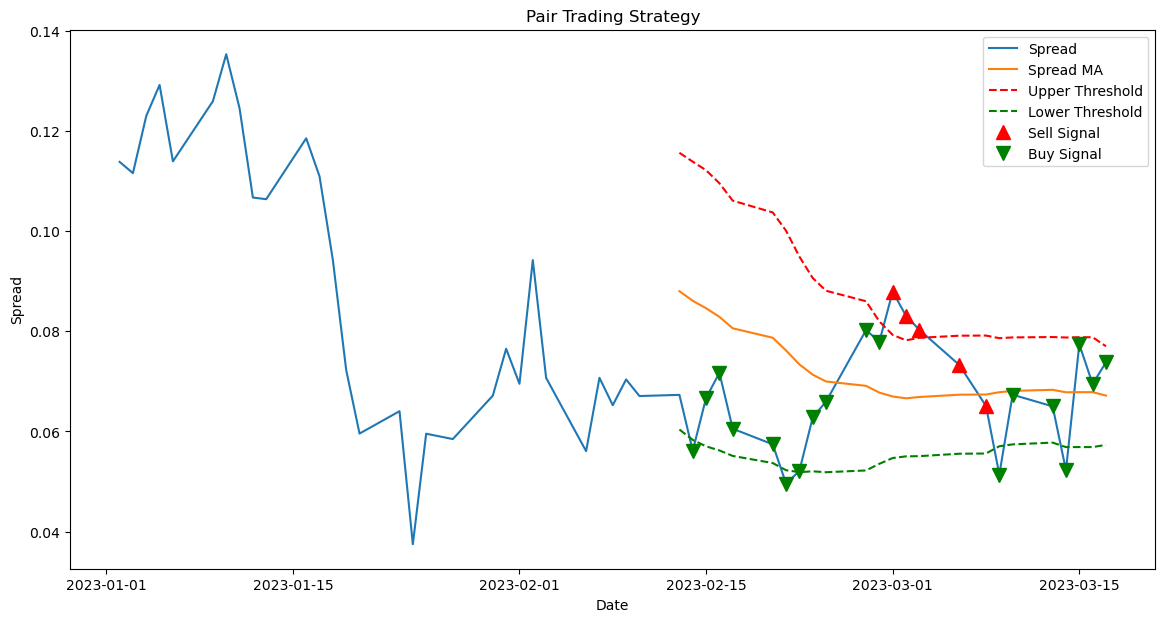

Cumulative Returns: 0.912232474597488


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
# Assuming 'test' is your DataFrame containing prices for HDFCBANK and KOTAKBANK
# Replace 'test' with your actual DataFrame name if it's different
# Assuming the DataFrame has columns 'HDFCBANK' and 'KOTAKBANK'
# Replace them with actual column names if they are different
# Also assuming 'test' contains datetime index
# Replace 'DatetimeIndex' with the actual index name if it's different
# test = pd.read_csv("your_data.csv")  # Load your dataset here

# Calculate spread
test['Spread'] = np.log(test['KOTAKBANK']) - np.log(test['HDFCBANK'])

# Define parameters
  # Rolling window for moving average and standard deviation
window = 30
z_threshold_upper = 1  # Upper Z-score threshold for going SHORT
z_threshold_lower = -1  # Lower Z-score threshold for going LONG

# Calculate rolling mean and standard deviation of the spread
test['Spread_MA'] = test['Spread'].rolling(window=window).mean()
test['Spread_STD'] = test['Spread'].rolling(window=window).std()

# Calculate Z-score
test['Z_Score'] = (test['Spread'] - test['Spread_MA']) / test['Spread_STD']

# Initialize positions
test['Position'] = np.nan

# Generate signals
test.loc[test['Z_Score'] > z_threshold_upper, 'Position'] = -1  # SHORT signal
test.loc[test['Z_Score'] < z_threshold_lower, 'Position'] = 1  # LONG signal

# Forward fill the positions to maintain them until the next signal
test['Position'].ffill(inplace=True)

# Calculate returns
test['HDFCBANK_Returns'] = test['HDFCBANK'].pct_change()
test['KOTAKBANK_Returns'] = test['KOTAKBANK'].pct_change()
test['Strategy_Returns'] = test['Position'].shift(1) * (test['HDFCBANK_Returns'] - test['KOTAKBANK_Returns'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Spread'], label='Spread')
plt.plot(test.index, test['Spread_MA'], label='Spread MA')
plt.plot(test.index, test['Spread_MA'] + z_threshold_upper * test['Spread_STD'], 'r--', label='Upper Threshold')
plt.plot(test.index, test['Spread_MA'] + z_threshold_lower * test['Spread_STD'], 'g--', label='Lower Threshold')
plt.plot(test[test['Position'] == -1].index, test['Spread'][test['Position'] == -1], '^', markersize=10, color='r', lw=0, label='Sell Signal')
plt.plot(test[test['Position'] == 1].index, test['Spread'][test['Position'] == 1], 'v', markersize=10, color='g', lw=0, label='Buy Signal')
plt.legend()
plt.title('Pair Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.show()

# Output strategy returns
strategy_returns = test['Strategy_Returns'].dropna()
cumulative_returns = (strategy_returns + 1).cumprod()
print("Cumulative Returns:", cumulative_returns.iloc[-1])


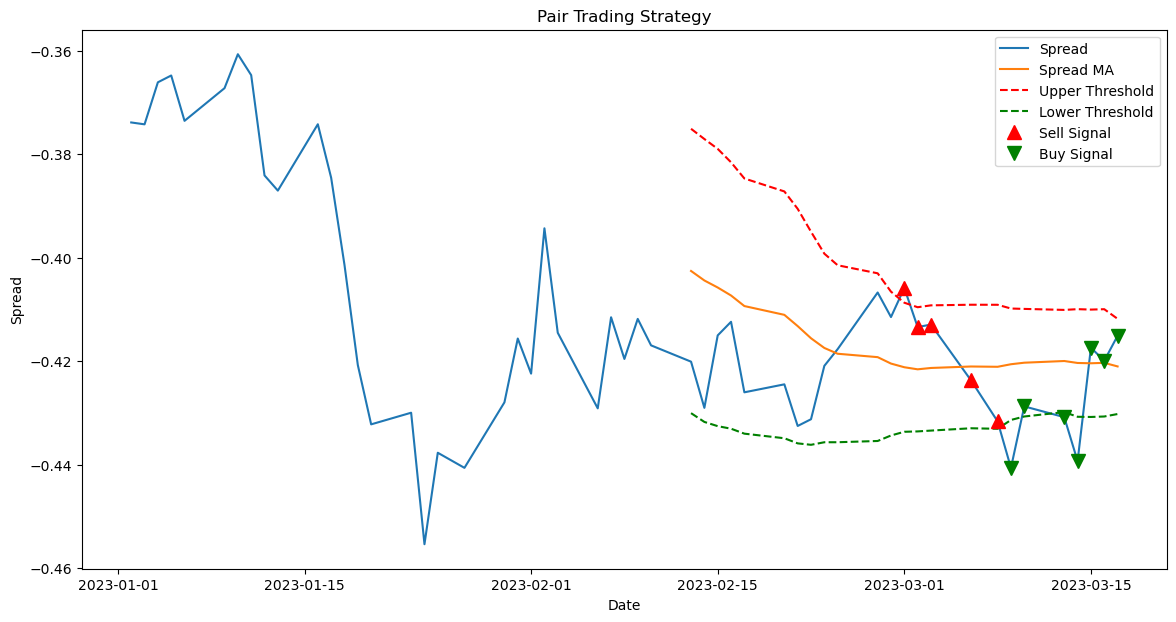

Cumulative Returns: 0.9411176668246438


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate spread
test['Spread'] = np.log(test['KOTAKBANK']) - np.log(test['HDFC'])

# Define parameters
# Rolling window for moving average and standard deviation

window = 30
z_threshold_upper = 1  # Upper Z-score threshold for going SHORT
z_threshold_lower = -1  # Lower Z-score threshold for going LONG

# Calculate rolling mean and standard deviation of the spread
test['Spread_MA'] = test['Spread'].rolling(window=window).mean()
test['Spread_STD'] = test['Spread'].rolling(window=window).std()

# Calculate Z-score
test['Z_Score'] = (test['Spread'] - test['Spread_MA']) / test['Spread_STD']

# Initialize positions
test['Position'] = np.nan

# Generate signals
test.loc[test['Z_Score'] > z_threshold_upper, 'Position'] = -1  # SHORT signal
test.loc[test['Z_Score'] < z_threshold_lower, 'Position'] = 1  # LONG signal

# Forward fill the positions to maintain them until the next signal
test['Position'].ffill(inplace=True)

# Calculate returns
test['HDFC_Returns'] = test['HDFC'].pct_change()
test['KOTAKBANK_Returns'] = test['KOTAKBANK'].pct_change()
test['Strategy_Returns'] = test['Position'].shift(1) * (test['HDFC_Returns'] - test['KOTAKBANK_Returns'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Spread'], label='Spread')
plt.plot(test.index, test['Spread_MA'], label='Spread MA')
plt.plot(test.index, test['Spread_MA'] + z_threshold_upper * test['Spread_STD'], 'r--', label='Upper Threshold')
plt.plot(test.index, test['Spread_MA'] + z_threshold_lower * test['Spread_STD'], 'g--', label='Lower Threshold')
plt.plot(test[test['Position'] == -1].index, test['Spread'][test['Position'] == -1], '^', markersize=10, color='r', lw=0, label='Sell Signal')
plt.plot(test[test['Position'] == 1].index, test['Spread'][test['Position'] == 1], 'v', markersize=10, color='g', lw=0, label='Buy Signal')
plt.legend()
plt.title('Pair Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.show()

# Output strategy returns
strategy_returns = test['Strategy_Returns'].dropna()
cumulative_returns = (strategy_returns + 1).cumprod()
print("Cumulative Returns:", cumulative_returns.iloc[-1])


### We can see for period of last 30 day window. 

###  We have 91.22% profit for KOTAKBANK and HDFCBANK
###  We have 94.22% profit for KOTAKBANK and HDFC

In [61]:
import pandas as pd
import numpy as np

# Assuming 'test' DataFrame is available with required columns and cumulative_returns is calculated

# Profitability Metrics
total_return = cumulative_returns.iloc[-1]  # Total Return
positive_returns = cumulative_returns[cumulative_returns > 0]
win_rate = len(positive_returns) / len(cumulative_returns)  # Win Rate

# Risk Metrics
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()  # Maximum Drawdown
volatility = strategy_returns.std()  # Volatility
risk_free_rate = 0.03  # Assuming a risk-free rate of 3%
sharpe_ratio = (total_return - risk_free_rate) / volatility  # Sharpe Ratio

downside_returns = strategy_returns[strategy_returns < 0]
downside_volatility = downside_returns.std()
sortino_ratio = (total_return - risk_free_rate) / downside_volatility  # Sortino Ratio

# Output the metrics
print("Profitability Metrics:")
print("Total Return (%):", total_return)
print("Win Rate (%):", win_rate * 100)
print("\nRisk Metrics:")
print("Maximum Drawdown (%):", max_drawdown * 100)
print("Volatility (%):", volatility * 100)
print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio)


Profitability Metrics:
Total Return (%): 0.9411176668246438
Win Rate (%): 100.0

Risk Metrics:
Maximum Drawdown (%): -5.225277393139094
Volatility (%): 0.8420146107223145
Sharpe Ratio: 108.20687137994551
Sortino Ratio: 165.648530083893
